In [1]:
# Referral: https://www.datacamp.com/tutorial/introduction-factor-analysis?irclickid=yD50a9T1txyNRriyXCRw8XCiUkAyqeXBR0ulzI0&irgwc=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER

import pandas as pd
from src.load_data import loader
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Data
loader = loader()
deps, mods = loader.load_data()

In [3]:
# Concatenation
cdeps = pd.concat(list(deps.values()), axis=1)
print(cdeps.columns)
## with chatbot_familiarity
cmods_w = pd.concat(list(mods.values()), axis=1)
## without chatbot_familiary
lst = ['anger','empathy','online_preference']
lmods = [mods.get(i) for i in lst]
cmods_wo = pd.concat(lmods, axis=1)

Index(['Trustworthy', 'Honesty', 'Ability', 'OverallTrust', 'Thinking',
       'Contemplated', 'Demanding', 'Effort', 'helpfulness', 'usefulness',
       'informative'],
      dtype='object')


In [4]:
# Adequacy Test
## Barlett's Test - checks Intercorrelation
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(cdeps)
print("dependent variables", chi_square_value, p_value) # Passed
chi_square_value,p_value=calculate_bartlett_sphericity(cmods_w)
print("moderating variables with familiarity", chi_square_value, p_value) # Passed - around 0
chi_square_value,p_value=calculate_bartlett_sphericity(cmods_wo)
print("moderating variables without familiarity", chi_square_value, p_value) # Passed - around 0

dependent variables 1986.6736574691022 0.0
moderating variables with familiarity 1305.7925197018897 5.530995069427616e-237
moderating variables without familiarity 1294.687545571566 8.692224523230902e-242


In [5]:
## Kaiser-Meyer-Olkin Test - Suitability
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(cdeps)
print("dependent variables", kmo_model) # Passed > 0.6
kmo_all,kmo_model=calculate_kmo(cmods_w)
print("moderating variables with familiarity", kmo_model) # Passed > 0.6
kmo_all,kmo_model=calculate_kmo(cmods_wo)
print("moderating variables without familiarity", kmo_model) # Passed > 0.6

dependent variables 0.7840463277747035
moderating variables with familiarity 0.6772093822100355
moderating variables without familiarity 0.6788260281936062


[4.20255085 2.72041523 1.38068077 0.63301503 0.56114738 0.40988625
 0.32141586 0.28193836 0.22707849 0.18667046 0.07520131]
[0.0, 0.38205007737661123, 0.6293605530322304, 0.7548769866033596, 0.812423807437077, 0.8634372052695796, 0.9006995916240716, 0.9299192156414018, 0.9555499756139609, 0.9761934748709574, 0.9931635169923042]
                     0         1         2
Trustworthy   0.003128  0.193813  0.795037
Honesty      -0.005107  0.089504  0.661473
Ability      -0.048227  0.224206  0.635143
OverallTrust -0.029690  0.253109  0.855181
Thinking      0.831423 -0.060911 -0.003498
Contemplated  0.634864 -0.063866 -0.063192
Demanding     0.863596 -0.161936  0.025792
Effort        0.825131 -0.093424 -0.014871
helpfulness  -0.196543  0.919698  0.235822
usefulness   -0.141519  0.904880  0.243375
informative  -0.071590  0.749612  0.280622


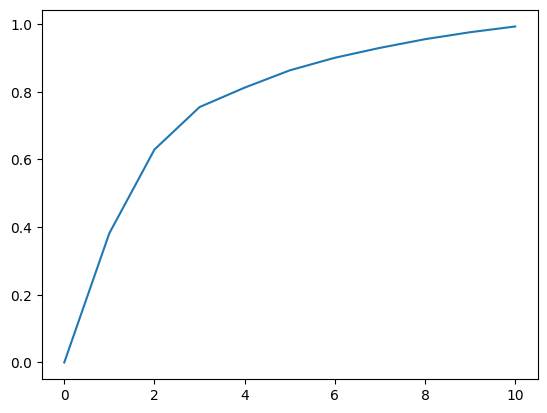

In [6]:
fa = FactorAnalyzer()
fa.fit(cdeps)
ev, v = fa.get_eigenvalues()
print(ev)
ev_cum = []
for i in range(len(ev)):
    ev_cum.append(sum(ev[0:i])/sum(ev))
print(ev_cum)
plt.plot(ev_cum)
fa.set_params(n_factors = 3, rotation = 'varimax')
fa.fit(cdeps)
loadings = fa.loadings_
np.save("data/loadings/dep_loadings.npy", loadings)
mloadings = pd.DataFrame(loadings, index = cdeps.columns.values)
print(mloadings)

[2.63467013 2.45121274 1.81251299 1.08642757 0.91413576 0.73185907
 0.40287718 0.3134885  0.29885055 0.25404557 0.09991994]
0.9121541309863829
                       0         1         2         3
Familiarity    -0.041585 -0.010134  0.004341  0.494613
Mad             0.887551 -0.027079  0.002973 -0.094183
Angry           0.992089  0.004524  0.032207  0.028820
Furious         0.789429  0.050663  0.081500  0.005800
Perfer         -0.000021  0.857196 -0.022386 -0.119953
Comfort        -0.009952  0.856364  0.021429  0.046294
online          0.042076  0.814307 -0.022992 -0.072141
Compassionate   0.005175 -0.009855  0.333507  0.166262
Misfortune      0.083969  0.058879  0.694292 -0.040927
TenderFeelings -0.002867 -0.026126  0.842045 -0.026044
Friend          0.029809 -0.125502  0.240880  0.269047


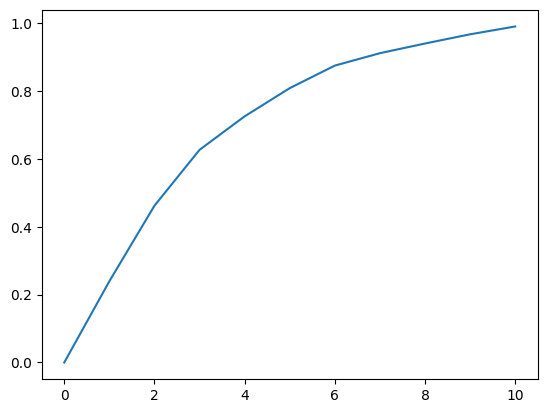

In [7]:
fa = FactorAnalyzer()
fa.fit(cmods_w)
ev, v = fa.get_eigenvalues()
print(ev)
ev_cum = []
for i in range(len(ev)):
    ev_cum.append(sum(ev[0:i])/sum(ev))
plt.plot(ev_cum)
# print(ev/sum(ev))
# plt.plot(ev/sum(ev))
print(sum(ev[0:7])/sum(ev))
fa.set_params(n_factors = 4, rotation = 'varimax')
fa.fit(cmods_w)
loadings = fa.loadings_
np.save("data/loadings/mod_loadings.npy", loadings)
mloadings = pd.DataFrame(loadings, index = cmods_w.columns.values)
print(mloadings)

In [8]:
fa = FactorAnalyzer()
fa.fit(cmods_w)
ev, v = fa.get_eigenvalues()
print(ev)
fa.set_params(n_factors = 3, rotation = 'varimax')
fa.fit(cmods_w)
loadings = fa.loadings_
mloadings = pd.DataFrame(loadings, index = cmods_w.columns.values)
print(mloadings)

[2.63467013 2.45121274 1.81251299 1.08642757 0.91413576 0.73185907
 0.40287718 0.3134885  0.29885055 0.25404557 0.09991994]
                       0         1         2
Familiarity    -0.054832 -0.045890  0.034886
Mad             0.888711 -0.030209  0.013159
Angry           0.987292 -0.009529  0.052920
Furious         0.788905  0.042381  0.095873
Perfer          0.013353  0.865927 -0.049210
Comfort        -0.003379  0.838900  0.006256
online          0.053316  0.820092 -0.044735
Compassionate  -0.006268 -0.014853  0.341964
Misfortune      0.074646  0.079713  0.690661
TenderFeelings -0.015083 -0.001370  0.831168
Friend          0.014628 -0.138129  0.253920


In [9]:
fa = FactorAnalyzer()
fa.fit(cdeps)
ev, v = fa.get_eigenvalues()
print(ev)
fa.set_params(n_factors = 4, method ='principal', rotation = 'varimax')
fa.fit(cdeps)
loadings = fa.loadings_
mloadings = pd.DataFrame(loadings, index = cdeps.columns.values)
print(mloadings)

[4.20255085 2.72041523 1.38068077 0.63301503 0.56114738 0.40988625
 0.32141586 0.28193836 0.22707849 0.18667046 0.07520131]
                     0         1         2         3
Trustworthy   0.238975  0.012471  0.677512  0.489219
Honesty       0.114843 -0.012003  0.898685  0.192040
Ability       0.192421 -0.036543  0.175184  0.884630
OverallTrust  0.283839 -0.015320  0.470954  0.727138
Thinking     -0.060162  0.876548 -0.004154 -0.006130
Contemplated -0.059419  0.758756 -0.212042  0.102332
Demanding    -0.165123  0.873822  0.131592 -0.088419
Effort       -0.092793  0.863948  0.056936 -0.079262
helpfulness   0.915950 -0.186672  0.067449  0.212222
usefulness    0.921645 -0.133723  0.103281  0.179093
informative   0.876248 -0.048994  0.192846  0.110458


In [10]:
# Confirmatory Factor Analysis
# Referral: https://pypi.org/project/factor-analyzer/
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)

In [11]:
# confirm deps
dep_model_dict = {"Cognitive Effort": ["Thinking", "Contemplated", "Demanding", "Effort"],
                  "Credibility": ["Trustworthy", "Honesty", "Ability", "OverallTrust"],
                  "Helpfulness": ["helpfulness", "usefulness", "informative"]}
dep_model_spec = ModelSpecificationParser.parse_model_specification_from_dict(cdeps, dep_model_dict)
cfa = ConfirmatoryFactorAnalyzer(dep_model_spec, disp=False)
cfa.fit(cdeps.values)
print(cfa.loadings_)

[[1.24652474 0.         0.        ]
 [0.97406286 0.         0.        ]
 [1.3458722  0.         0.        ]
 [1.61416644 0.         0.        ]
 [0.         1.59079021 0.        ]
 [0.         1.03370449 0.        ]
 [0.         1.7000718  0.        ]
 [0.         1.61536554 0.        ]
 [0.         0.         1.50410284]
 [0.         0.         1.30324434]
 [0.         0.         0.06089197]]


In [12]:
# Confirm mods_w
mod_model_dict = {
    "Anger": ["Mad", "Angry", "Furious"],
    "Chatbot Familiarity": ["Familiarity"],
    "Empathy": ["Compassionate", "Misfortune", "TenderFeelings", "Friend"],
    "Online Preferences": ["Perfer", "Comfort", "Online"]
}
mod_model_spec = ModelSpecificationParser.parse_model_specification_from_dict(cmods_w, mod_model_dict)
cfa = ConfirmatoryFactorAnalyzer(mod_model_spec, disp=False)
cfa.fit(cmods_w)
print(cfa.loadings_)

[[-23.75368      0.           0.           0.        ]
 [ 52.26811751   0.           0.           0.        ]
 [ 60.50140678   0.           0.           0.        ]
 [  0.          35.59929124   0.           0.        ]
 [  0.           0.          46.09238253   0.        ]
 [  0.           0.          43.0149891    0.        ]
 [  0.           0.          41.92264975   0.        ]
 [  0.           0.         -85.99899413   0.        ]
 [  0.           0.           0.          19.33153711]
 [  0.           0.           0.         -10.94134006]
 [  0.           0.           0.         -14.49911699]]


In [13]:
mod_model_dict = {
    "Anger": ["Mad", "Angry", "Furious"],
    "Empathy": ["Compassionate", "Misfortune", "TenderFeelings", "Friend"],
    "Online Preferences": ["Perfer", "Comfort", "Online"]
}
mod_model_spec = ModelSpecificationParser.parse_model_specification_from_dict(cmods_wo, mod_model_dict)
cfa = ConfirmatoryFactorAnalyzer(mod_model_spec, disp=False)
cfa.fit(cmods_wo)
print(cfa.loadings_)

[[1.77141029 0.         0.        ]
 [1.95407029 0.         0.        ]
 [1.41464143 0.         0.        ]
 [0.         0.33244371 0.        ]
 [0.         1.06695333 0.        ]
 [0.         1.03180122 0.        ]
 [0.         0.42386483 0.        ]
 [0.         0.         1.70725209]
 [0.         0.         1.67191068]
 [0.         0.         1.63404157]]
